In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from statannot import add_stat_annotation

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

# ECG Overall

## Scatter plot results

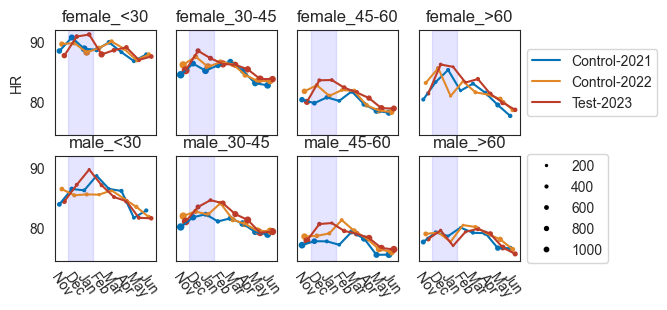

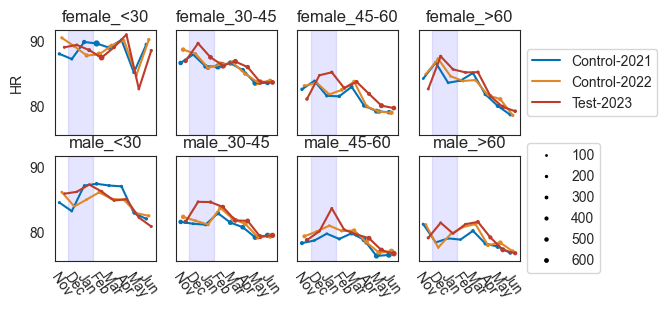

In [2]:
l_months2 = [11,12,1,2,3,4,5,6]

tag = "v000763"
plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, x="month", y=tag, hue="period", 
                                                         order=[11,12,1,2,3,4,5,6], hue_order=["Control-2021", "Control-2022", "Test-2023"])
fig.savefig(f"{workdir}/FigureS5_A.pdf")

plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, x="month", y=tag, hue="period", 
                                                         order=[11,12,1,2,3,4,5,6], hue_order=["Control-2021", "Control-2022", "Test-2023"])
fig.savefig(f"{workdir}/.FigureS5_A-3y.pdf")

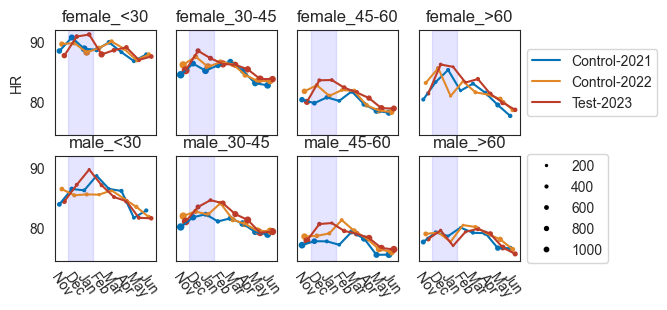

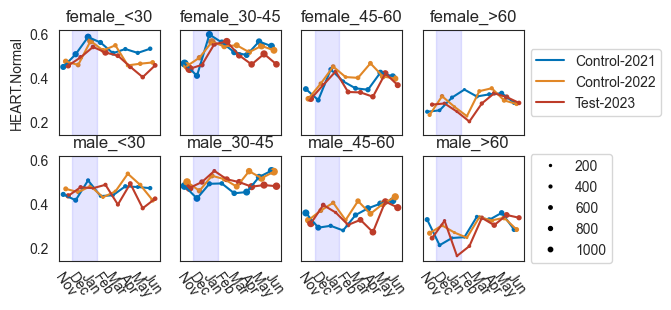

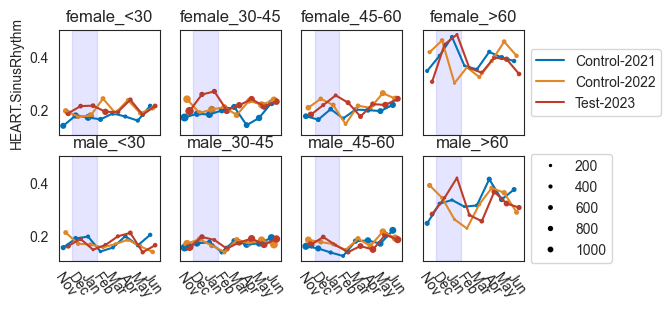

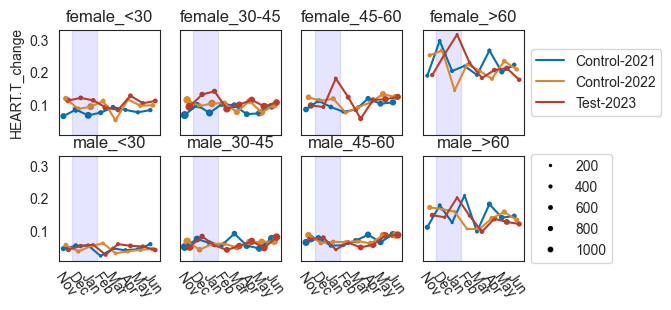

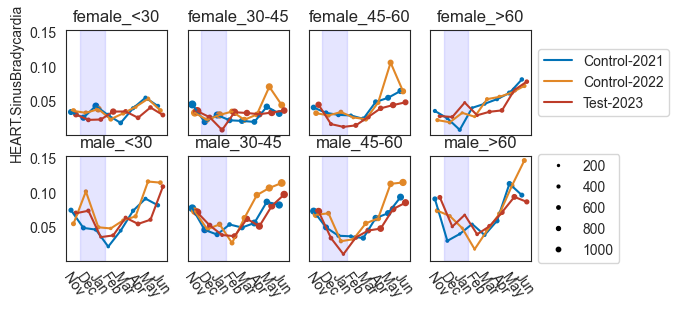

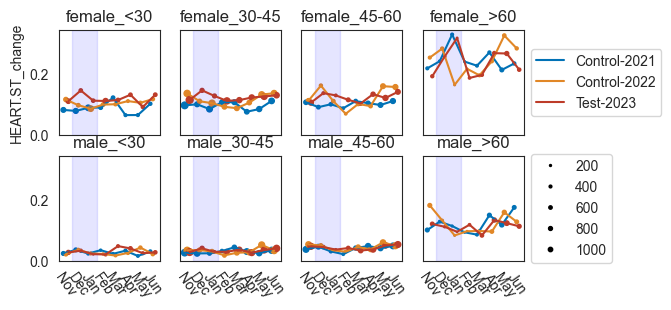

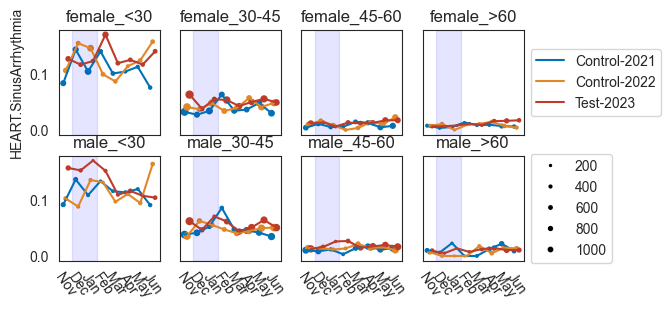

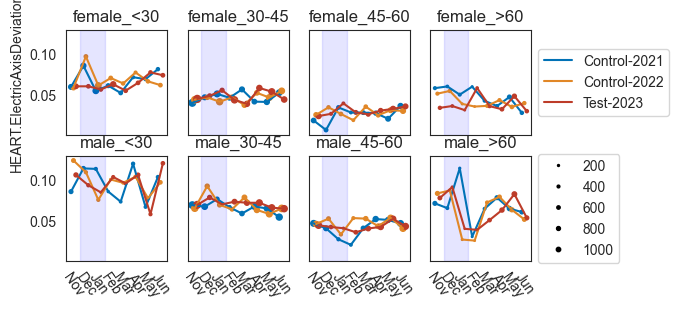

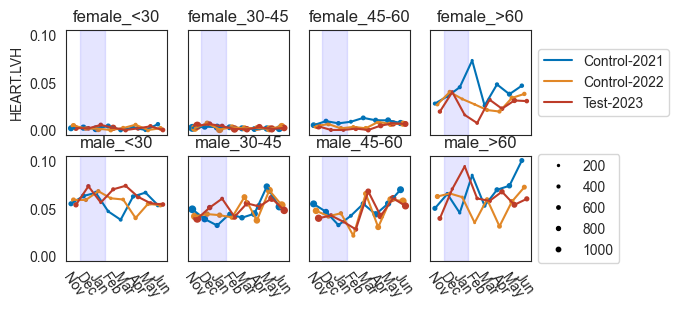

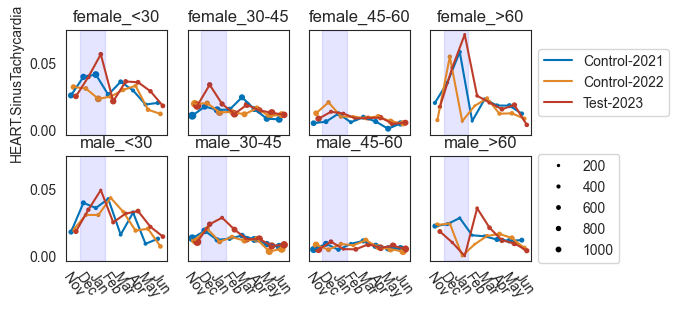

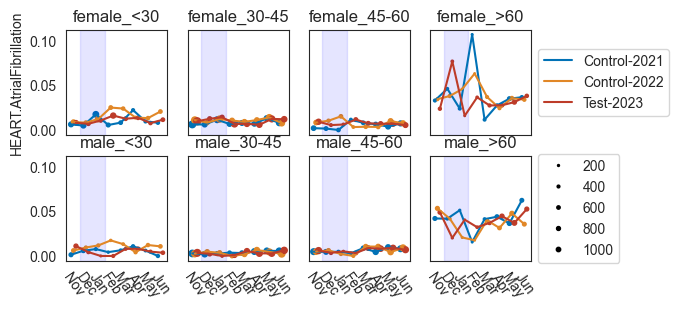

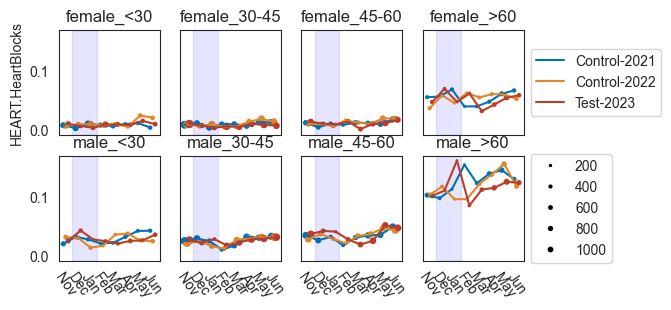

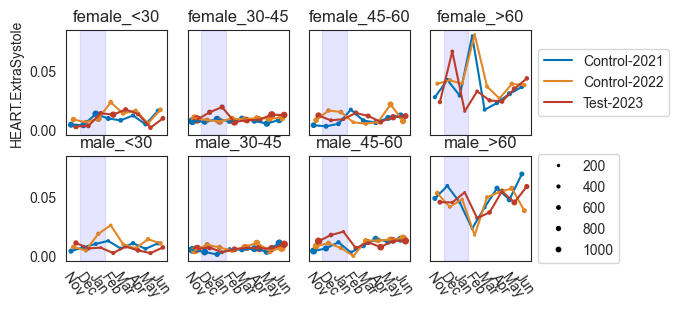

In [3]:
for tag in [ "v000763",
        'HEART.Normal',
        'HEART.SinusRhythm', 'HEART.T_change', 'HEART.SinusBradycardia',
        'HEART.ST_change', 'HEART.SinusArrhythmia',
        'HEART.ElectricAxisDeviation', 'HEART.LVH', 'HEART.SinusTachycardia',
        'HEART.AtrialFibrillation', 'HEART.HeartBlocks', 'HEART.ExtraSystole'
    ]:
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months2)


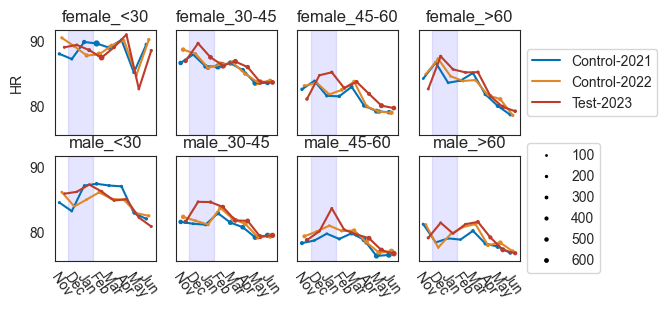

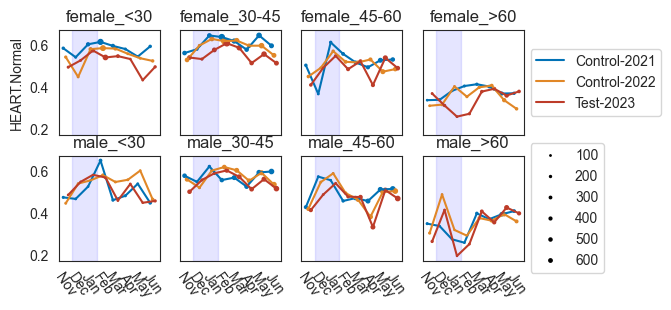

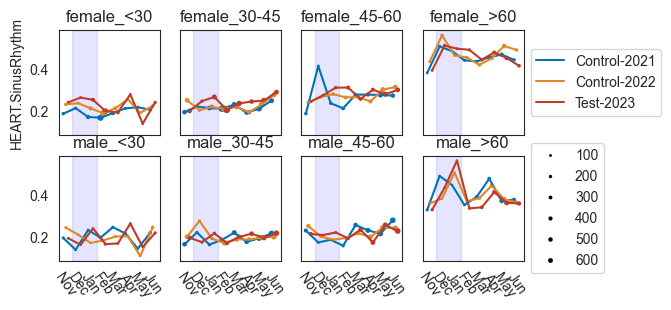

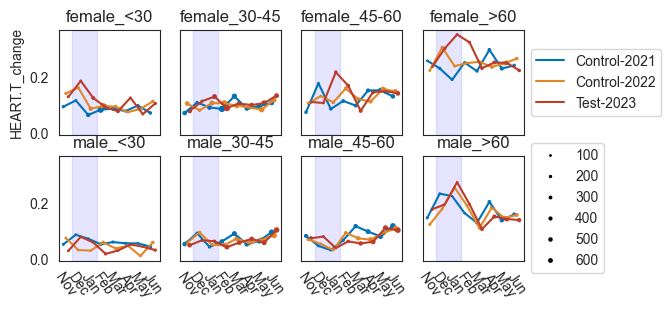

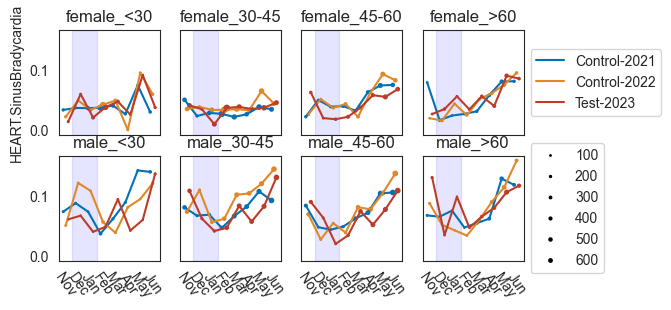

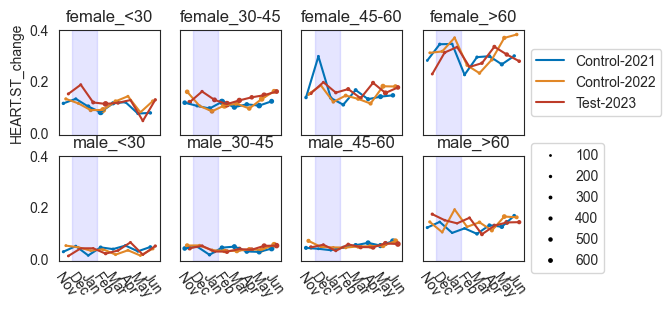

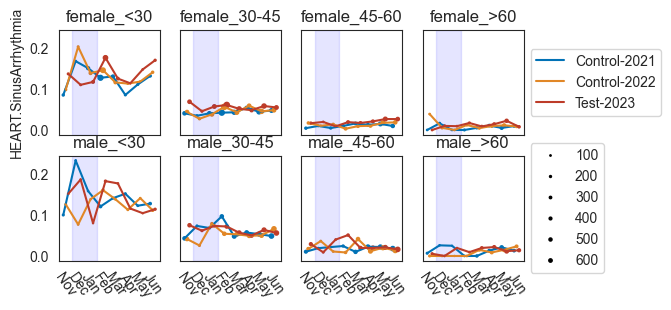

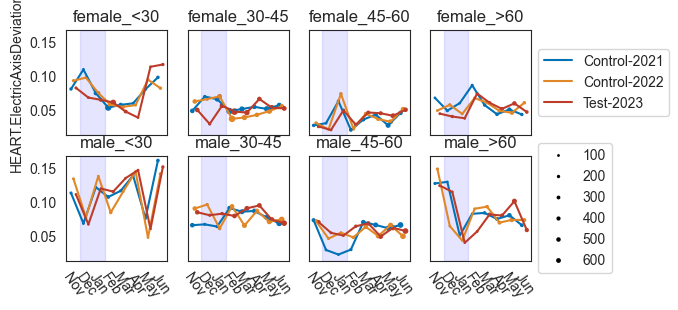

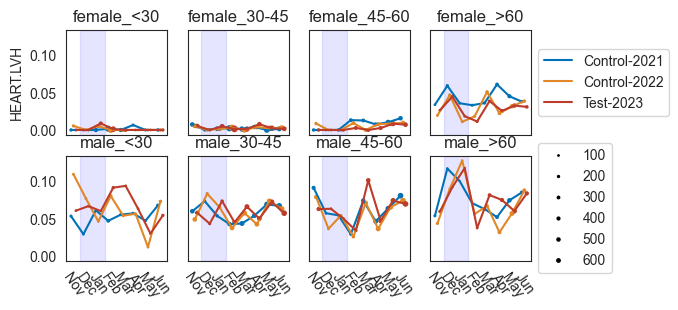

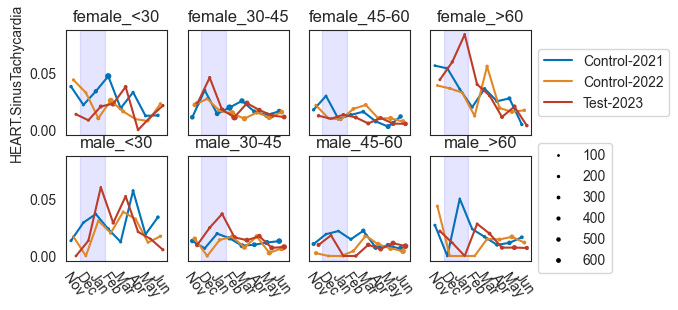

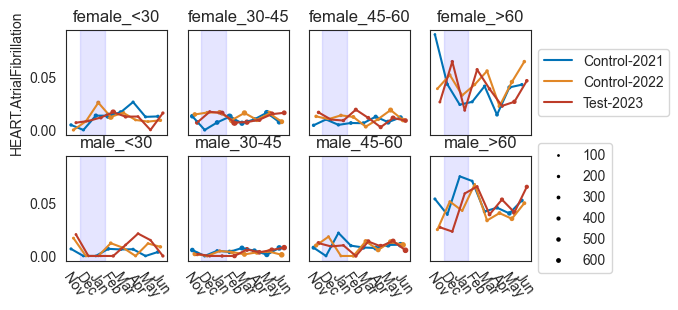

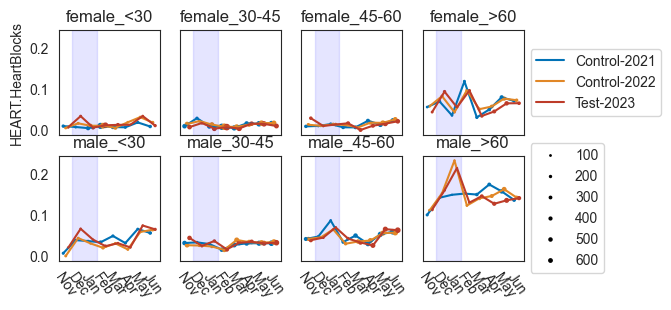

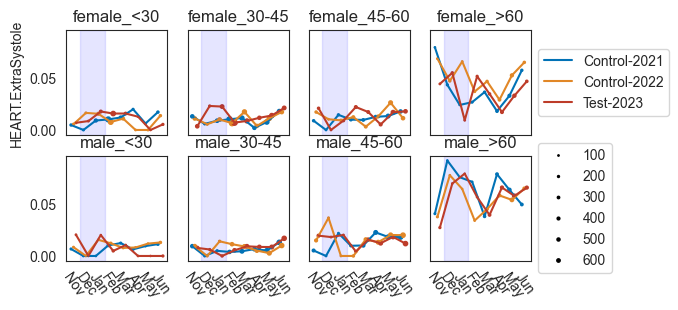

In [4]:
for tag in [ "v000763",
        'HEART.Normal',
        'HEART.SinusRhythm', 'HEART.T_change', 'HEART.SinusBradycardia',
        'HEART.ST_change', 'HEART.SinusArrhythmia',
        'HEART.ElectricAxisDeviation', 'HEART.LVH', 'HEART.SinusTachycardia',
        'HEART.AtrialFibrillation', 'HEART.HeartBlocks', 'HEART.ExtraSystole'
    ]:
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months2)


len                                      \
month                            1     2    3    4    5    6    11   12   
gender age_groups period                                                  
female 30-45      Control-2021  566  1279  788  500  923  673  541  173   
                  Control-2022  603  1381  811  523  901  641  548  183   
                  Test-2023     628  1426  814  517  872  619  566  175   
       45-60      Control-2021  208   304  314  400  679  510  227  101   
                  Control-2022  218   326  320  389  693  535  234   98   
                  Test-2023     225   366  351  382  713  563  242  102   
       <30        Control-2021  444  1193  421  152  162  235  211  137   
                  Control-2022  389  1056  370  106  127  220  183  123   
                  Test-2023     341   959  319   79   88  188  146  118   
       >60        Control-2021   84   151  194  279  399  211   89  186   
                  Control-2022   92   164  216  313  442  233  103  193   
                  Test-2023     108   176  233  353  490  259  114  202   
male   30-45      Control-2021  205   517  667  612  768  925  535  150   
                  Control-2022  215   535  662  589  736  905  532  156   
                  Test-2023     218   556  652  580  706  892  520  162   
       45-60      Control-2021   92   206  500  669  772  943  384  105   
                  Control-2022   92   233  508  687  750  960  406  110   
                  Test-2023     100   235  514  658  715  934  414  111   
       <30        Control-2021   82   298  163  158  106  266  150  103   
                  Control-2022   65   249  130  124   85  233  119   91   
                  Test-2023      50   208   96   95   67  184   99   75   
       >60        Control-2021   40    85  239  308  524  306  149   77   
                  Control-2022   47    89  269  347  599  342  161   78   
                  Test-2023      51   107  307  414  682  430  185   87   

                                    mean            ... func_q5      func_q95  \
month                                 1         2   ...      11   12       1    
gender age_groups period                            ...                         
female 30-45      Control-2021  0.091873  0.086787  ...     0.0  0.0      0.0   
                  Control-2022  0.107794  0.106445  ...     0.0  0.0      0.0   
                  Test-2023     0.130573  0.090463  ...     0.0  0.0      0.0   
       45-60      Control-2021  0.086538  0.115132  ...     0.0  0.0      0.0   
                  Control-2022  0.110092  0.159509  ...     0.0  0.0      0.0   
                  Test-2023     0.217778  0.169399  ...     0.0  0.0      0.0   
       <30        Control-2021  0.065315  0.083822  ...     0.0  0.0      0.0   
                  Control-2022  0.087404  0.097538  ...     0.0  0.0      0.0   
                  Test-2023     0.126100  0.092805  ...     0.0  0.0      0.0   
       >60        Control-2021  0.190476  0.251656  ...     0.0  0.0      0.0   
                  Control-2022  0.239130  0.250000  ...     0.0  0.0      0.0   
                  Test-2023     0.351852  0.323864  ...     0.0  0.0      0.0   
male   30-45      Control-2021  0.043902  0.063830  ...     0.0  0.0      0.0   
                  Control-2022  0.051163  0.050467  ...     0.0  0.0      0.0   
                  Test-2023     0.064220  0.043165  ...     0.0  0.0      0.0   
       45-60      Control-2021  0.032609  0.067961  ...     0.0  0.0      0.0   
                  Control-2022  0.032609  0.094421  ...     0.0  0.0      0.0   
                  Test-2023     0.040000  0.063830  ...     0.0  0.0      0.0   
       <30        Control-2021  0.073171  0.053691  ...     0.0  0.0      0.0   
                  Control-2022  0.030769  0.060241  ...     0.0  0.0      0.0   
                  Test-2023     0.060000  0.019231  ...     0.0  0.0      0.0   
       >60        Control-2021  0.225000  0.164706  ...     0.

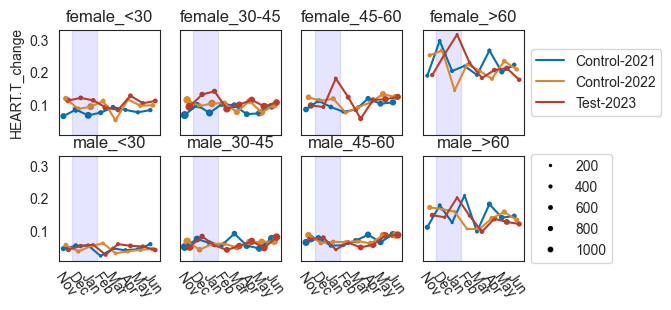

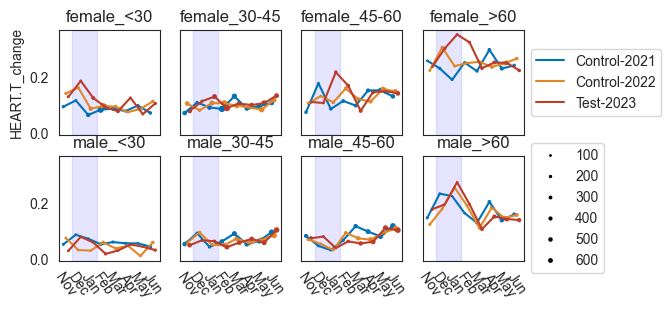

In [5]:
tag = 'HEART.T_change'
fig, df_res = plt_scatter.plot_scatter_ax_plus(df_table1plus, tag, order=l_months2)
fig.savefig(f"{workdir}/Figure5_B.pdf")

fig, df_res = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months2)
fig.savefig(f"{workdir}/.Figure5_B-3y.pdf")
df_res

## Stackplot for different types of ECG results.

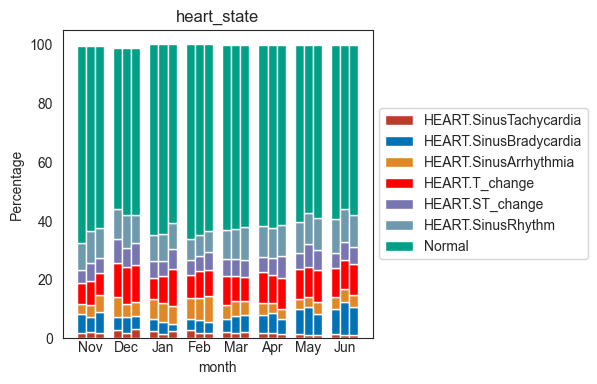

In [6]:
x = "month"
order= [11,12, 1,2,3, 4,5,6]
hue = "period"
hue_order = ["Control-2021", "Control-2022", "Test-2023"]
y = "heart_state"
y_order = ["HEART.SinusTachycardia",  "HEART.SinusBradycardia", "HEART.SinusArrhythmia","HEART.T_change", "HEART.ST_change", "HEART.SinusRhythm"]
pal = ["#BD3C29", "#0172B6", "#E18727", "#FF0000", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

stack_plot = Stack(figsize=(4,4))
fig,df_tmp = stack_plot.plot_bar_stacked(df_table1plus_3p_revMM, x, hue, y, y_order, order=order, hue_order=hue_order, 
            cmap=None)
fig.savefig(f"{workdir}/Figure5_A.pdf")

In [7]:
df_tmp[df_tmp["month"]==1]

heart_state        period  month  HEART.ST_change  HEART.SinusArrhythmia  \
0            Control-2021      1         6.039489               7.026713   
8            Control-2022      1         5.110337               6.155633   
16              Test-2023      1         6.910569               6.039489   

heart_state  HEART.SinusBradycardia  HEART.SinusRhythm  \
0                          4.006969           8.652729   
8                          4.123113           9.465738   
16                         2.380952           8.826945   

heart_state  HEART.SinusTachycardia  HEART.T_change     Normal  total  
0                          2.264808        6.968641  64.982578   1722  
8                          1.393728        9.233449  64.459930   1722  
16                         2.380952       12.659698  60.743322   1722

## sankey plots

In [8]:

df_cnt = pd.melt(
    df_table1plus_3p_revMM[
        ["sample_id",'HEART.Normal', 'HEART.T_change', 'HEART.ST_change', 
                 "period", "month", "age_groups","gender"]
    ],id_vars = ["sample_id", "month", "period", "age_groups", "gender"]).\
    pivot(index=["sample_id","variable", "month", "age_groups", "gender"], columns="period", values="value").\
    reset_index().drop(["sample_id"], axis=1).value_counts().reset_index()

df_cnt_sub = df_cnt[(df_cnt["variable"]=="HEART.T_change") &
                    (df_cnt["month"]==1) & (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]==">60")
]
df_cnt_sub = df_cnt[(df_cnt["variable"]=="HEART.T_change") &
                    (df_cnt["month"]==1) &
                    (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]=="45-60")
]

print(df_cnt_sub.to_markdown())

|      | variable       |   month | age_groups   | gender   |   Control-2021 |   Control-2022 |   Test-2023 |   0 |
|-----:|:---------------|--------:|:-------------|:---------|---------------:|---------------:|------------:|----:|
|  111 | HEART.T_change |       1 | 45-60        | female   |              0 |              0 |           0 | 136 |
|  453 | HEART.T_change |       1 | 45-60        | female   |              0 |              0 |           1 |  24 |
|  975 | HEART.T_change |       1 | 45-60        | female   |              0 |              1 |           1 |   7 |
| 1097 | HEART.T_change |       1 | 45-60        | female   |              1 |              0 |           1 |   5 |
| 1105 | HEART.T_change |       1 | 45-60        | female   |              1 |              1 |           1 |   5 |
| 1219 | HEART.T_change |       1 | 45-60        | female   |              1 |              0 |           0 |   3 |
| 1220 | HEART.T_change |       1 | 45-60        | female   |           

In [9]:
l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "HEART.T_change"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

plt_sankey = Sankey(rename_dict=rename_dict)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs)
fig.show()

import plotly.io as pio
pio.write_image(fig,
                f"{workdir}/Figure5_C.pdf"
)

In [10]:
l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "HEART.T_change"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

plt_sankey = Sankey(rename_dict=rename_dict)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs)
fig.show()
pio.write_image(fig,
                f"{workdir}/Figure5_C_[11,12].pdf"
)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs)
fig.show()
pio.write_image(fig,
                f"{workdir}/Figure5_C.pdf"
)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs)
fig.show()
pio.write_image(fig,
                f"{workdir}/Figure5_C_[1,2].pdf"
)


In [11]:
l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "HEART.T_change"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

plt_sankey = Sankey(rename_dict=rename_dict)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs, by_gender=False)
fig.show()
pio.write_image(fig,
                f"{workdir}/.Figure5_C_[11,12]_both-gender.pdf"
)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs, by_gender=False)
fig.show()
pio.write_image(fig,
                f"{workdir}/.Figure5_C_both-gender.pdf"
)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs, by_gender=False)
fig.show()
pio.write_image(fig,
                f"{workdir}/.Figure5_C_[1,2]_both-gender.pdf"
)


In [12]:
gender = ["female", "male"]
l_age_groups = ["45-60", ">60"]

for l_months in [[11,12], [1,2], [3,4]]:
    df_cnt_sub = df_cnt[(df_cnt["variable"]=="HEART.T_change") &
                        (df_cnt["month"].isin(l_months)) &
                        (df_cnt["gender"].isin(gender)) &
                        (df_cnt["age_groups"].isin(l_age_groups))
    ]


    df_sum_prev = df_cnt_sub.groupby(["Control-2021","Control-2022"])[0].agg(sum)
    n_01_prev = df_sum_prev.loc[0].loc[1]
    
    df_sum_this = df_cnt_sub.groupby(["Control-2022","Test-2023"])[0].agg(sum)
    n_01_this = df_sum_this.loc[0].loc[1]
    n_total = df_cnt_sub[0].sum()
    print(f"{gender}, month {l_months}, age group {l_age_groups},  {100 * n_01_this / n_01_prev - 100:.0f}%, n = {n_total}")

['female', 'male'], month [11, 12], age group ['45-60', '>60'],  13%, n = 1231
['female', 'male'], month [1, 2], age group ['45-60', '>60'],  42%, n = 1088
['female', 'male'], month [3, 4], age group ['45-60', '>60'],  14%, n = 2616


## HEART.SinusBradycardia

In [13]:
l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "HEART.SinusArrhythmia"
l_age_groups = ["<30", "30-45", "45-60", ">60"]


df_cnt = pd.melt(
    df_table1plus_3p_revMM[
        ["sample_id",'HEART.Normal', tag, 
                 "period", "month", "age_groups","gender"]
    ],id_vars = ["sample_id", "month", "period", "age_groups", "gender"]).\
    pivot(index=["sample_id","variable", "month", "age_groups", "gender"], columns="period", values="value").\
    reset_index().drop(["sample_id"], axis=1).value_counts().reset_index()

df_cnt_sub = df_cnt[(df_cnt["variable"]==tag) &
                    (df_cnt["month"]==1) & (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]==">60")
]
df_cnt_sub = df_cnt[(df_cnt["variable"]==tag) &
                    (df_cnt["month"]==1) &
                    (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]=="45-60")
]

print(df_cnt_sub.to_markdown())

plt_sankey = Sankey(rename_dict=rename_dict)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs)
fig.show()

|     | variable              |   month | age_groups   | gender   |   Control-2021 |   Control-2022 |   Test-2023 |   0 |
|----:|:----------------------|--------:|:-------------|:---------|---------------:|---------------:|------------:|----:|
|  54 | HEART.SinusArrhythmia |       1 | 45-60        | female   |              0 |              0 |           0 | 178 |
| 720 | HEART.SinusArrhythmia |       1 | 45-60        | female   |              0 |              1 |           0 |   3 |
| 803 | HEART.SinusArrhythmia |       1 | 45-60        | female   |              0 |              0 |           1 |   2 |
| 867 | HEART.SinusArrhythmia |       1 | 45-60        | female   |              1 |              0 |           0 |   1 |


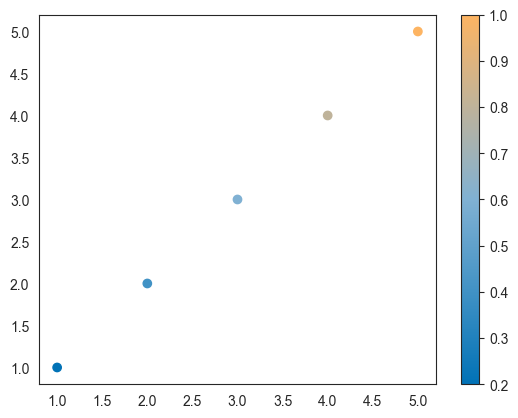

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

color_map = mcolors.LinearSegmentedColormap.from_list("my_cmap", ['#0172B6', '#80b1d3', '#fdb462'])

# 示例数据
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
z = [0.2, 0.4, 0.6, 0.8, 1.0]

plt.scatter(x, y, c=z, cmap=color_map)

plt.colorbar()
plt.show()